<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Telecomm EDA Challenge Lab

_Author: Alex Combs (NYC) _

---

Let's do some Exploratory Data Analysis (EDA)! As a data scientist, you often may find yourself given a data set you've never seen before, and asked to do a rapid analysis. This is today's goal.

# Prompt

You work for a telecommunications company. The company has been storing metadata about customer phone usage, as part of the regular course of business. Currently, this data is sitting in an unsecured database. The company doesn't want to pay to increase their database security, because they don't think there's really anything to be learned from the metadata.

They are under pressure from "right to privacy" organizations to beef up the database security. These organizations argue that you can learn a lot about a person from their cell phone metadata.

The telecom company wants to understand if this is true, and they want your help. They will give you one person's metadata for 2014 and want to see what you can learn from it.

Working in teams, create a report revealing everything you can about the person. Prepare a presentation, with slides, showcasing your findings.


# The Data

The [person's metadata](./datasets/metadata.csv) has the following fields:

| Field Name          | Description
| ---                 | ---
| **Cell Cgi**        | cell phone tower identifier
| **Cell Tower**      | cell phone tower location
| **Comm Identifier** |	de-identified recipient of communication
| **Comm Timedate String** | time of communication
| **Comm Type	Id**  | type of communication
| **Latitude**        | latitude of communication
| **Longitude**       | longitude of communication


# Hints

This is totally open-ended! If you're totally stumped -- and only if stumped -- should you look below for prompts. As a starting point, given that you have geo-locations, consider investigating ways to display this type of information (i.e. mapping functionality).

<font color='white'>
Well for starters, he's in Australia!

Ideas for things to look into:
- where does he work?
- where does he live?
- who does he contact most often?
- what hours does he work?
- did he move?
- did he go on holiday?  If so, where did he go?
- did he get a new phone?

Challenges:
- how does he get to work?
- where does his family live?
- if he went on holiday, can you find which flights he took?
- can you guess who some of his contacts are, based on the frequency, location, time and mode (phone/text) of communications?


If you're stuck on how to map the data, you can try "basemap" or "gmplot", or anything else you find online.
</font>

In [13]:
##!conda install folium --yes
!pip install folium
!pip install geopy

# pygmaps

!pip install gpxpy
import gpxpy.geo

In [3]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [6]:
path_to_file = './datasets/metadata.csv'
df = pd.read_csv(path_to_file)
df.head()

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,10476.0,-35.136188,3.141723,-42.884810,-33.884603,-33.79661,-33.78815,-33.55731
Longitude,10476.0,150.612841,1.470169,144.848243,151.202296,151.26654,151.26654,151.28934


In [9]:
df.corr()

,Latitude,Longitude
Latitude,1.000000,0.950091
Longitude,0.950091,1.000000


In [14]:
df.head(50)

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690
5,5050101532B23,CHIPPENDALE,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,4/1/14 17:36,Phone,-33.884171,151.202350
6,5050101536E5E,CHIPPENDALE,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,4/1/14 17:40,Phone,-33.884171,151.202350
7,5050101531F08,REDFERN TE,7cb96eadd3ff95e25406d24794027c443c0661c5,4/2/14 19:18,Phone,-33.892933,151.202296
8,505010153111F,HAYMARKET #,de40c5c1f9249f95f7fb216931db58747afef74f,4/3/14 14:35,Phone,-33.880329,151.205690
9,505010153111F,HAYMARKET #,66f32c1163d0e597983b65c51f5a477070ad3785,4/3/14 14:36,Phone,-33.880329,151.205690


In [11]:
df.shape

(10476, 7)

In [12]:
df.dtypes

Cell Cgi                 object
Cell Tower Location      object
Comm Identifier          object
Comm Timedate String     object
Comm Type                object
Latitude                float64
Longitude               float64
dtype: object

In [25]:
df.groupby("Comm Type").size()

Comm Type
Internet    9102
Phone        717
SMS          657
dtype: int64

In [26]:
grouped=df.groupby("Comm Type")

In [ ]:
for group in grouped:
    print"group_type", group[0]
    print "head", group [1].head()
    print "--------------------"

In [41]:
#comtime=df.groupby(["Comm Type","Comm Timedate String"])
comtime=df.groupby(["Comm Type","Cell Tower Location"])

In [30]:
len(comtime)


6724

In [42]:
comtime.count()

Cell Cgi  Comm Identifier  \
Comm Type Cell Tower Location                                                
Internet  71 MACQUARIE ST                              40                0   
          AIRPORT LINK                                  4                0   
          BALGOWLAH HAYES ST                         3929                0   
          BALGOWLAH TE                                 27                0   
          BALGOWLAH VILLAGE SHOPPING CENTRE IBC        96                0   
          BEECHWORTH                                  109                0   
          BENALLA EAST                                 28                0   
          BEROWRA WINDY BANKS INTERCHANGE               3                0   
          BRICKWORKS                                  490                0   
          BROADWAY OTC                                 77                0   
          CENTRAL SRA DONOR                             6                0   
          CHINATOWN                                   123                0   
          CHIPPENDALE                                 981                0   
          COLLINS ST (HOBART)                          13                0   
          COWAN 1051 PACIFIC HWY                        1                0   
          COWAN LOT 1                                   1                0   
          CREMORNE #                                   12                0   
          CREMORNE JUNCTION; GERARD ST                  5                0   
          DARLINGHURST                                  4                0   
          DEE WHY                                      12                0   
          FAIRLIGHT 137 SYDNEY RD                     419                0   
          HARBORD 22 WAINE ST                         408                0   
          HAYMARKET #                                 404                0   
          HAYMARKET TE LEVEL 5 SRA BTS HOTEL           12                0   
          HOBART AIRPORT                                9                0   
          KENT #                                       11                0   
          LENEVA; WODONGA TIP OFF BEACHWORTH RD         6                0   
          LUTANA                                        3                0   
          MANLY #                                     217                0   
          MANLY NTH STEYNE                             37                0   
...                                                   ...              ...   
SMS       BRICKWORKS                                    2                2   
          BROADWAY OTC                                  2                2   
          BROOKLYN PACIFIC HWY                          1                1   
          CENTRAL SRA DONOR                             1                1   
          CHINATOWN                                    29               29   
          CHIPPENDALE                                  29               29   
          COWAN 1051 PACIFIC HWY                        3                3   
          COWAN LOT 1                                   1                1   
          CREMORNE #                                    1                1   
          DARLINGHURST                                  2                2   
          FAIRLIGHT 137 SYDNEY RD                      16               16   
          HARBORD 22 WAINE ST                           7                7   
          HAYMARKET #                                  79               79   
          HOBART AIRPORT                                1                1   
          MANLY #                                       5                5   
          MANLY NTH STEYNE                              1                1   
          MANLY SOUTH STEYNE                            2                2   
          MASCOT M5 MOTORWAY EMERGENCY STAIRS           2                2   
          NEUTRAL BAY MILITARYRD                        1              

In [55]:
comlocation=df.groupby("Cell Tower Location").size()

In [65]:
comlocation.sort_values(ascending=False).head(15)

Cell Tower Location
BALGOWLAH HAYES ST                       4301
CHIPPENDALE                              1084
SUNDERLAND ST                             723
REDFERN TE                                712
HAYMARKET #                               563
BRICKWORKS                                501
HARBORD 22 WAINE ST                       465
FAIRLIGHT 137 SYDNEY RD                   454
MANLY #                                   231
NEW TOWN                                  197
CHINATOWN                                 161
BEECHWORTH                                112
BALGOWLAH VILLAGE SHOPPING CENTRE IBC     106
MANLY SOUTH STEYNE                         92
BROADWAY OTC                               85
dtype: int64

In [62]:
location=comlocation.sort_values(ascending=False)

In [63]:
def top_location(data):
    data = data.sort_values(comlocation, ascending=False)
    subset = data[data['Comm Type'] == 'internet']
    return sunset

In [64]:
top_location(df)

KeyError: '[  49    5    1 4301   30  106  112   29    4  501   85    1    1   10  161\n 1084   15    4    2   14    6    1    6    1   16    1  454    1  465  563\n   14   17   15    7    4  231   40   92    4    1   13   65   33    1    3\n   29  197    1    7    6    4  712    1    2   19   20  723   22   45    5\n    3    4   22   22    2    8   20   16   10    2    5] not in index'

In [48]:
df.groupby('Comm Type').apply(top_location)

,,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude
Comm Type,,,,,,,,


In [17]:
import time;

In [21]:
localtime = time.localtime(time.time())
print "Local current time :", localtime

Local current time : time.struct_time(tm_year=2018, tm_mon=2, tm_mday=13, tm_hour=19, tm_min=19, tm_sec=11, tm_wday=1, tm_yday=44, tm_isdst=0)


In [25]:
print metadata["Comm Timedate String"]

['4/1/14 9:40' '4/1/14 9:42' '4/1/14 13:13' ..., '4/1/15 22:44'
 '4/1/15 22:45' '4/1/15 23:49']


In [28]:
print metadata["Comm Type"].unique()

['Phone' 'SMS' 'Internet']


In [8]:
metadata.groupby(["Comm Timedate String", "Comm Type"]).count()

,,Cell Cgi,Cell Tower Location,Comm Identifier,Latitude,Longitude
Comm Timedate String,Comm Type,,,,,
1/1/15 0:19,Internet,2,2,0,2,2
1/1/15 0:20,Internet,1,1,0,1,1
1/1/15 10:01,Internet,2,2,0,2,2
1/1/15 10:03,Internet,6,6,0,6,6
1/1/15 10:04,Internet,2,2,0,2,2
1/1/15 10:06,Internet,1,1,0,1,1
1/1/15 10:08,Internet,1,1,0,1,1
1/1/15 10:14,Internet,1,1,0,1,1
1/1/15 10:16,Internet,1,1,0,1,1


In [9]:
metadata.groupby(["Comm Timedate String"]).count()

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Type,Latitude,Longitude
Comm Timedate String,,,,,,
1/1/15 0:19,2,2,0,2,2,2
1/1/15 0:20,1,1,0,1,1,1
1/1/15 10:01,2,2,0,2,2,2
1/1/15 10:03,6,6,0,6,6,6
1/1/15 10:04,2,2,0,2,2,2
1/1/15 10:06,1,1,0,1,1,1
1/1/15 10:08,1,1,0,1,1,1
1/1/15 10:14,1,1,0,1,1,1
1/1/15 10:16,1,1,0,1,1,1


In [3]:
metadata.groupby(["Comm Type"]).count()

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Latitude,Longitude
Comm Type,,,,,,
Internet,9102,9102,0,9102,9102,9102
Phone,717,717,717,717,717,717
SMS,657,657,657,657,657,657


In [11]:
import datetime
date_obj = datetime.datetime.strptime(metadata["Comm Timedate String"], '%d %b %Y')
print date_obj

TypeError: strptime() argument 1 must be string, not Series

In [4]:
metadata.groupby(["Comm Type","Comm Timedate String"]).count()

Cell Cgi  Cell Tower Location  \
Comm Type Comm Timedate String                                  
Internet  1/1/15 0:19                  2                    2   
          1/1/15 0:20                  1                    1   
          1/1/15 10:01                 2                    2   
          1/1/15 10:03                 6                    6   
          1/1/15 10:04                 2                    2   
          1/1/15 10:06                 1                    1   
          1/1/15 10:08                 1                    1   
          1/1/15 10:14                 1                    1   
          1/1/15 10:16                 1                    1   
          1/1/15 10:19                 1                    1   
          1/1/15 10:21                 1                    1   
          1/1/15 10:24                 1                    1   
          1/1/15 10:27                 1                    1   
          1/1/15 10:29                 1                    1   
          1/1/15 10:34                 1                    1   
          1/1/15 10:37                 1                    1   
          1/1/15 10:39                 1                    1   
          1/1/15 10:42                 1                    1   
          1/1/15 10:49                 1                    1   
          1/1/15 11:02                 2                    2   
          1/1/15 11:03                 4                    4   
          1/1/15 15:24                 1                    1   
          1/1/15 17:04                 1                    1   
          1/1/15 18:05                 1                    1   
          1/1/15 19:13                 1                    1   
          1/1/15 19:34                 2                    2   
          1/1/15 19:35                 1                    1   
          1/1/15 1:11                  2                    2   
          1/1/15 1:37                  1                    1   
          1/1/15 21:19                 2                    2   
...                                  ...                  ...   
SMS       9/16/14 18:47                1                    1   
          9/16/14 18:49                1                    1   
          9/16/14 18:50                1                    1   
          9/16/14 22:35                1                    1   
          9/16/14 22:41                1                    1   
          9/16/14 22:42                1                    1   
          9/16/14 22:44                1                    1   
          9/16/14 22:48                1                    1   
          9/16/14 22:50                1                    1   
          9/16/14 22:51                2                    2   
          9/16/14 22:52                2                    2   
          9/16/14 22:55                1                    1   
          9/16/14 22:56                1                    1   
          9/16/14 22:57                1                    1   
          9/16/14 22:58                1                    1   
          9/16/14 22:59                1                    1   
          9/16/14 23:00                3                    3   
          9/16/14 23:01                1                    1   
          9/16/14 23:02                1                    1   
          9/16/14 23:05                2                    2   
          9/17/14 18:52                2                    2   
          9/17/14 19:03                1                    1   
          9/21/14 12:07                1                    1   
          9/21/14 12:09                2                    2   
          9/21/14 12:15                1                    1   
          9/28/14 12:02                2                    2   
          9/28/14 14:49                1                    1   
          9/29/14 21:27                1                    1   
          9/4/14 17:38                 1                    1   
  

In [20]:

metadata.groupby(["Comm Type","Comm Timedate String"]).count()


Cell Cgi  Cell Tower Location  \
Comm Type Comm Timedate String                                  
Internet  1/1/15 0:19                  2                    2   
          1/1/15 0:20                  1                    1   
          1/1/15 10:01                 2                    2   
          1/1/15 10:03                 6                    6   
          1/1/15 10:04                 2                    2   
          1/1/15 10:06                 1                    1   
          1/1/15 10:08                 1                    1   
          1/1/15 10:14                 1                    1   
          1/1/15 10:16                 1                    1   
          1/1/15 10:19                 1                    1   
          1/1/15 10:21                 1                    1   
          1/1/15 10:24                 1                    1   
          1/1/15 10:27                 1                    1   
          1/1/15 10:29                 1                    1   
          1/1/15 10:34                 1                    1   
          1/1/15 10:37                 1                    1   
          1/1/15 10:39                 1                    1   
          1/1/15 10:42                 1                    1   
          1/1/15 10:49                 1                    1   
          1/1/15 11:02                 2                    2   
          1/1/15 11:03                 4                    4   
          1/1/15 15:24                 1                    1   
          1/1/15 17:04                 1                    1   
          1/1/15 18:05                 1                    1   
          1/1/15 19:13                 1                    1   
          1/1/15 19:34                 2                    2   
          1/1/15 19:35                 1                    1   
          1/1/15 1:11                  2                    2   
          1/1/15 1:37                  1                    1   
          1/1/15 21:19                 2                    2   
...                                  ...                  ...   
SMS       9/16/14 18:47                1                    1   
          9/16/14 18:49                1                    1   
          9/16/14 18:50                1                    1   
          9/16/14 22:35                1                    1   
          9/16/14 22:41                1                    1   
          9/16/14 22:42                1                    1   
          9/16/14 22:44                1                    1   
          9/16/14 22:48                1                    1   
          9/16/14 22:50                1                    1   
          9/16/14 22:51                2                    2   
          9/16/14 22:52                2                    2   
          9/16/14 22:55                1                    1   
          9/16/14 22:56                1                    1   
          9/16/14 22:57                1                    1   
          9/16/14 22:58                1                    1   
          9/16/14 22:59                1                    1   
          9/16/14 23:00                3                    3   
          9/16/14 23:01                1                    1   
          9/16/14 23:02                1                    1   
          9/16/14 23:05                2                    2   
          9/17/14 18:52                2                    2   
          9/17/14 19:03                1                    1   
          9/21/14 12:07                1                    1   
          9/21/14 12:09                2                    2   
          9/21/14 12:15                1                    1   
          9/28/14 12:02                2                    2   
          9/28/14 14:49                1                    1   
          9/29/14 21:27                1                    1   
          9/4/14 17:38                 1                    1   
  

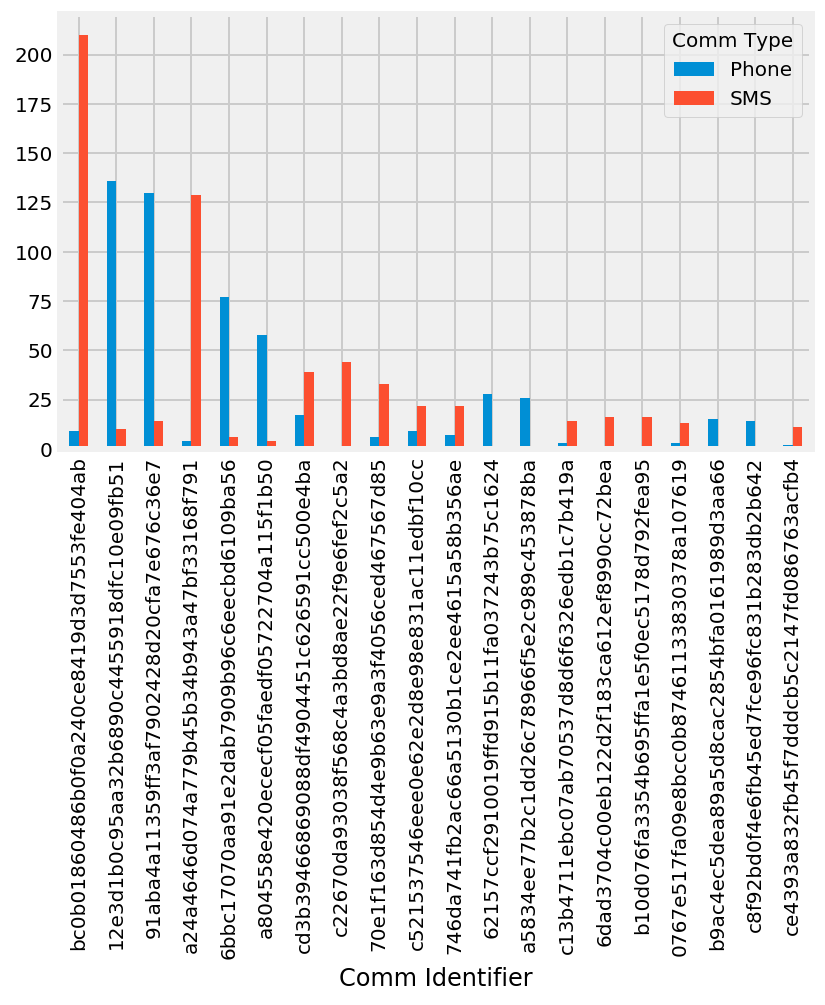

In [22]:
Comms = metadata.groupby(["Comm Identifier","Comm Type"]).size().sort_values(ascending = False)

def addrows(row):
    return row["Phone"] + row["SMS"]

Comms2 = Comms.unstack()
Comms2 = Comms2.fillna(0)
Comms2["Total"] = Comms2.apply(addrows, axis=1)
Comms2 = Comms2.sort_values(["Total"], ascending = False)

Comms2[0:20].drop("Total", axis=1).plot(kind = "bar")